In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("../Data/CO_2021_final_raw.xlsx")

In [3]:
df.head()

,state,year,distid_stateassigned,schoolid_stateassigned,distname,schoolname,ncesdistid_admin,ncesdistid_geo,census_id,ncesid,...,nces_charter,nces_magnet,nces_title1,nces_title1_schoolwide,nces_freelunch,nces_reducedlunch,nces_poverty,nces_address,nces_city,nces_zip
0,CO,2020-2021,10,187,MAPLETON 1,Mapleton Expeditionary School of the Arts,805550.0,805550.0,6500101000000,8.055500e+10,...,2-No,2-No,6-Not a Title I school,NaN,310.0,86.0,0.649180,8980 YORK STREET,THORNTON,80299.0
1,CO,2020-2021,10,212,MAPLETON 1,Mapleton Early College High School,805550.0,805550.0,6500101000000,8.055500e+10,...,2-No,2-No,6-Not a Title I school,NaN,119.0,50.0,0.625926,8980 YORK STREET,THORNTON,80229.0
2,CO,2020-2021,10,263,MAPLETON 1,Global Leadership Academy,805550.0,805550.0,6500101000000,8.055500e+10,...,2-No,2-No,6-Not a Title I school,NaN,148.0,40.0,0.698885,7480 CONIFER ROAD,DENVER,80221.0
3,CO,2020-2021,10,309,MAPLETON 1,Academy High School,805550.0,805550.0,6500101000000,8.055500e+10,...,2-No,2-No,6-Not a Title I school,NaN,216.0,68.0,0.633929,8970 YORK STREET,THORNTON,80229.0
4,CO,2020-2021,10,501,MAPLETON 1,Monterey Community School,805550.0,805550.0,6500101000000,8.055500e+10,...,2-No,1-Yes,6-Not a Title I school,NaN,NaN,NaN,NaN,2210 MCELWAIN BLVD,DENVER,80229.0


In [4]:
df.shape

(1951, 38)

In [5]:
missing = df.isnull().sum()
missing

state                           0
year                            0
distid_stateassigned            0
schoolid_stateassigned          0
distname                        0
schoolname                      0
ncesdistid_admin               24
ncesdistid_geo                 24
census_id                       0
ncesid                         24
ncesenroll                     32
gradespan                      24
level                          24
enroll_raw_CO                   0
pp_stloc_raw_CO                44
pp_fed_raw_CO                 161
pp_total_raw_CO                18
pp_site_stloc_raw_CO            0
pp_site_fed_raw_CO              0
pp_site_raw_CO                 26
pp_centshare_stloc_raw_CO       0
pp_centshare_fed_raw_CO         0
pp_centshare_raw_CO            18
schoolstloc_raw_CO             44
schoolfed_raw_CO              161
schooltot_raw_CO               18
flag_NERDS                      0
nces_locale                    24
nces_charter                   24
nces_magnet   

In [6]:
df = df.drop(["ncesdistid_admin","ncesdistid_geo","census_id"], axis=1)

In [7]:
df = df.rename(columns = {"distid_stateassigned": "distid","schoolid_stateassigned": "schoolid", "enroll_raw_CO": "enroll_raw", "pp_stloc_raw_CO": "pp_stloc_raw", "pp_fed_raw_CO": "pp_fed_raw", "pp_total_raw_CO": "pp_total_raw","pp_site_stloc_raw_CO":"pp_site_stloc_raw","pp_site_fed_raw_CO": "pp_site_fed_raw","pp_site_raw_CO":"pp_site_raw","pp_centshare_stloc_raw_CO":"pp_centshare_stloc_raw","pp_centshare_fed_raw_CO":"pp_centshare_fed_raw","pp_centshare_raw_CO":"pp_centshare_raw","schoolstloc_raw_CO":"schoolstloc_raw","schoolfed_raw_CO":"schoolfed_raw","schooltot_raw_CO":"schooltot_raw","flag_NERDS":"flag"})

In [8]:
df.head()

,state,year,distid,schoolid,distname,schoolname,ncesid,ncesenroll,gradespan,level,...,nces_charter,nces_magnet,nces_title1,nces_title1_schoolwide,nces_freelunch,nces_reducedlunch,nces_poverty,nces_address,nces_city,nces_zip
0,CO,2020-2021,10,187,MAPLETON 1,Mapleton Expeditionary School of the Arts,8.055500e+10,610.0,07-12,4.0,...,2-No,2-No,6-Not a Title I school,NaN,310.0,86.0,0.649180,8980 YORK STREET,THORNTON,80299.0
1,CO,2020-2021,10,212,MAPLETON 1,Mapleton Early College High School,8.055500e+10,270.0,09-12,4.0,...,2-No,2-No,6-Not a Title I school,NaN,119.0,50.0,0.625926,8980 YORK STREET,THORNTON,80229.0
2,CO,2020-2021,10,263,MAPLETON 1,Global Leadership Academy,8.055500e+10,269.0,09-12,4.0,...,2-No,2-No,6-Not a Title I school,NaN,148.0,40.0,0.698885,7480 CONIFER ROAD,DENVER,80221.0
3,CO,2020-2021,10,309,MAPLETON 1,Academy High School,8.055500e+10,448.0,09-12,4.0,...,2-No,2-No,6-Not a Title I school,NaN,216.0,68.0,0.633929,8970 YORK STREET,THORNTON,80229.0
4,CO,2020-2021,10,501,MAPLETON 1,Monterey Community School,8.055500e+10,0.0,K-08,3.0,...,2-No,1-Yes,6-Not a Title I school,NaN,NaN,NaN,NaN,2210 MCELWAIN BLVD,DENVER,80229.0


In [9]:
missing = df.isnull().sum()
missing

state                        0
year                         0
distid                       0
schoolid                     0
distname                     0
schoolname                   0
ncesid                      24
ncesenroll                  32
gradespan                   24
level                       24
enroll_raw                   0
pp_stloc_raw                44
pp_fed_raw                 161
pp_total_raw                18
pp_site_stloc_raw            0
pp_site_fed_raw              0
pp_site_raw                 26
pp_centshare_stloc_raw       0
pp_centshare_fed_raw         0
pp_centshare_raw            18
schoolstloc_raw             44
schoolfed_raw              161
schooltot_raw               18
flag                         0
nces_locale                 24
nces_charter                24
nces_magnet                 24
nces_title1                 24
nces_title1_schoolwide    1206
nces_freelunch             227
nces_reducedlunch          227
nces_poverty               228
nces_add

In [10]:
df.describe()

,distid,schoolid,ncesid,ncesenroll,level,enroll_raw,pp_stloc_raw,pp_fed_raw,pp_total_raw,pp_site_stloc_raw,...,pp_centshare_fed_raw,pp_centshare_raw,schoolstloc_raw,schoolfed_raw,schooltot_raw,flag,nces_freelunch,nces_reducedlunch,nces_poverty,nces_zip
count,1951.000000,1951.000000,1.927000e+03,1919.000000,1927.000000,1951.000000,1907.000000,1790.000000,1933.000000,1951.000000,...,1951.000000,1933.000000,1.907000e+03,1.790000e+03,1.933000e+03,1951.000000,1724.000000,1724.000000,1723.000000,1927.000000
mean,1452.317273,4694.856996,8.042595e+10,460.049505,2.750389,431.285495,12586.940745,1519.818994,13939.706674,9045.906715,...,598.102512,4103.175375,5.111506e+06,6.016896e+05,5.613791e+06,0.071758,161.737239,32.693735,0.466692,80587.517903
std,1517.267033,2894.881434,4.078024e+08,425.430986,0.899676,460.775306,13814.935304,1758.765937,14758.082489,13625.830035,...,557.952149,2620.435561,4.523203e+06,5.616222e+05,4.941689e+06,0.258153,160.706302,35.119597,0.259849,477.062805
min,10.000000,10.000000,8.000010e+10,0.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000,2.000000,0.000000,0.016207,80002.000000
25%,540.000000,2126.500000,8.030600e+10,222.500000,2.000000,204.000000,9848.500000,845.250000,11015.000000,6494.000000,...,312.000000,3235.000000,2.574860e+06,2.586820e+05,2.820402e+06,0.000000,54.000000,11.000000,0.245674,80204.000000
50%,1010.000000,4694.000000,8.039900e+10,365.000000,3.000000,358.000000,11433.000000,1276.500000,12762.000000,7837.000000,...,520.000000,4358.000000,4.197312e+06,4.737670e+05,4.628514e+06,0.000000,113.000000,23.000000,0.453634,80517.000000
75%,1790.000000,7169.500000,8.053100e+10,547.500000,4.000000,539.000000,13313.000000,1848.000000,14927.000000,9613.500000,...,854.000000,5238.000000,6.065335e+06,7.657568e+05,6.707682e+06,0.000000,221.000000,42.000000,0.681434,80920.000000
max,9175.000000,9809.000000,8.993001e+10,5308.000000,4.000000,5308.000000,361435.000000,47632.000000,409067.000000,358829.000000,...,3195.000000,40476.000000,4.807086e+07,6.335056e+06,5.440591e+07,1.000000,1362.000000,422.000000,1.000000,81657.000000


Drop NAN values

In [11]:
df = df[df['ncesid'].notna()]

In [12]:
missing = df.isnull().sum()
missing

state                        0
year                         0
distid                       0
schoolid                     0
distname                     0
schoolname                   0
ncesid                       0
ncesenroll                   8
gradespan                    0
level                        0
enroll_raw                   0
pp_stloc_raw                20
pp_fed_raw                 137
pp_total_raw                18
pp_site_stloc_raw            0
pp_site_fed_raw              0
pp_site_raw                  2
pp_centshare_stloc_raw       0
pp_centshare_fed_raw         0
pp_centshare_raw            18
schoolstloc_raw             20
schoolfed_raw              137
schooltot_raw               18
flag                         0
nces_locale                  0
nces_charter                 0
nces_magnet                  0
nces_title1                  0
nces_title1_schoolwide    1182
nces_freelunch             203
nces_reducedlunch          203
nces_poverty               204
nces_add

In [13]:
df.drop(df.loc[df['pp_stloc_raw']==-999].index, inplace=True)

In [14]:
df.shape

(1894, 35)

In [15]:
df.drop(df.loc[df['pp_fed_raw']==-999].index, inplace=True)
df.drop(df.loc[df['pp_total_raw']==-999].index, inplace=True)
df.drop(df.loc[df['pp_site_raw']==-999].index, inplace=True)
df.drop(df.loc[df['pp_centshare_raw']==-999].index, inplace=True)
df.drop(df.loc[df['schoolstloc_raw']==-999].index, inplace=True)
df.drop(df.loc[df['schoolfed_raw']==-999].index, inplace=True)
df.drop(df.loc[df['schooltot_raw']==-999].index, inplace=True)

In [16]:
df.shape

(1894, 35)

In [17]:
df['pp_stloc_raw'].fillna(value=df['pp_stloc_raw'].mean(), inplace=True)
df['pp_fed_raw'].fillna(value=df['pp_fed_raw'].mean(), inplace=True)
df['pp_total_raw'].fillna(value=df['pp_total_raw'].mean(), inplace=True)
df['pp_site_raw'].fillna(value=df['pp_site_raw'].mean(), inplace=True)
df['pp_centshare_raw'].fillna(value=df['pp_centshare_raw'].mean(), inplace=True)
df['schoolstloc_raw'].fillna(value=df['schoolstloc_raw'].mean(), inplace=True)
df['schoolfed_raw'].fillna(value=df['schoolfed_raw'].mean(), inplace=True)
df['schooltot_raw'].fillna(value=df['schooltot_raw'].mean(), inplace=True)

In [18]:
missing = df.isnull().sum()
missing

state                        0
year                         0
distid                       0
schoolid                     0
distname                     0
schoolname                   0
ncesid                       0
ncesenroll                   2
gradespan                    0
level                        0
enroll_raw                   0
pp_stloc_raw                 0
pp_fed_raw                   0
pp_total_raw                 0
pp_site_stloc_raw            0
pp_site_fed_raw              0
pp_site_raw                  0
pp_centshare_stloc_raw       0
pp_centshare_fed_raw         0
pp_centshare_raw             0
schoolstloc_raw              0
schoolfed_raw                0
schooltot_raw                0
flag                         0
nces_locale                  0
nces_charter                 0
nces_magnet                  0
nces_title1                  0
nces_title1_schoolwide    1155
nces_freelunch             182
nces_reducedlunch          182
nces_poverty               183
nces_add

In [19]:
#from sklearn.preprocessing import LabelEncoder  
from sklearn.impute import KNNImputer

In [20]:
df['nces_title1_schoolwide'].unique()

array([nan, '1-Yes', '2-No'], dtype=object)

In [22]:
knndf = df[["nces_title1_schoolwide"]]

In [25]:
knndf.isnull().sum()

nces_title1_schoolwide    1155
dtype: int64

In [26]:
knndf['nces_title1_schoolwide'] = knndf['nces_title1_schoolwide'].replace(['1-Yes','2-No'],[1,0])

C:\Users\yukef\AppData\Local\Temp\ipykernel_2596\1921052388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knndf['nces_title1_schoolwide'] = knndf['nces_title1_schoolwide'].replace(['1-Yes','2-No'],[1,0])


In [27]:
imputer = KNNImputer(n_neighbors=5)  # using knn number of neighbours be 5
new_knndf = pd.DataFrame(imputer.fit_transform(knndf))  # fitting

new_knndf.isnull().sum()  # check again

0    0
dtype: int64

In [28]:
new_knndf.rename(columns = {0:'nces_title1_schoolwide'}, inplace=True)  # change column back to original
knndf['nces_title1_schoolwide'] = knndf['nces_title1_schoolwide'].replace([1,0], ['1-Yes','2-No'])

C:\Users\yukef\AppData\Local\Temp\ipykernel_2596\3093371873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knndf['nces_title1_schoolwide'] = knndf['nces_title1_schoolwide'].replace([1,0], ['1-Yes','2-No'])


In [29]:
df2 = df.copy()
df2.drop(columns=['nces_title1_schoolwide'], inplace = True)
df2.shape

(1894, 34)

In [30]:
new_knndf.shape

(1894, 1)

In [31]:
df3 = pd.concat([df2, new_knndf], axis=1,join = 'inner')  # join these two df together
df3.shape

(1870, 35)

In [33]:
df3.isnull().sum()

state                       0
year                        0
distid                      0
schoolid                    0
distname                    0
schoolname                  0
ncesid                      0
ncesenroll                  2
gradespan                   0
level                       0
enroll_raw                  0
pp_stloc_raw                0
pp_fed_raw                  0
pp_total_raw                0
pp_site_stloc_raw           0
pp_site_fed_raw             0
pp_site_raw                 0
pp_centshare_stloc_raw      0
pp_centshare_fed_raw        0
pp_centshare_raw            0
schoolstloc_raw             0
schoolfed_raw               0
schooltot_raw               0
flag                        0
nces_locale                 0
nces_charter                0
nces_magnet                 0
nces_title1                 0
nces_freelunch            168
nces_reducedlunch         168
nces_poverty              169
nces_address                0
nces_city                   0
nces_zip  

In [34]:
df3['nces_freelunch'].fillna(value=df3['nces_freelunch'].median(), inplace=True)
df3['nces_reducedlunch'].fillna(value=df3['nces_reducedlunch'].median(), inplace=True)
df3['nces_poverty'].fillna(value=df3['nces_poverty'].median(), inplace=True)
df3['ncesenroll'].fillna(value=df3['ncesenroll'].median(), inplace=True)

In [35]:
df3.isnull().sum()

state                     0
year                      0
distid                    0
schoolid                  0
distname                  0
schoolname                0
ncesid                    0
ncesenroll                0
gradespan                 0
level                     0
enroll_raw                0
pp_stloc_raw              0
pp_fed_raw                0
pp_total_raw              0
pp_site_stloc_raw         0
pp_site_fed_raw           0
pp_site_raw               0
pp_centshare_stloc_raw    0
pp_centshare_fed_raw      0
pp_centshare_raw          0
schoolstloc_raw           0
schoolfed_raw             0
schooltot_raw             0
flag                      0
nces_locale               0
nces_charter              0
nces_magnet               0
nces_title1               0
nces_freelunch            0
nces_reducedlunch         0
nces_poverty              0
nces_address              0
nces_city                 0
nces_zip                  0
nces_title1_schoolwide    0
dtype: int64

In [36]:
df3.describe()

,distid,schoolid,ncesid,ncesenroll,level,enroll_raw,pp_stloc_raw,pp_fed_raw,pp_total_raw,pp_site_stloc_raw,...,pp_centshare_raw,schoolstloc_raw,schoolfed_raw,schooltot_raw,flag,nces_freelunch,nces_reducedlunch,nces_poverty,nces_zip,nces_title1_schoolwide
count,1870.000000,1870.000000,1.870000e+03,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,...,1870.000000,1.870000e+03,1.870000e+03,1.870000e+03,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,1312.423529,4695.042246,8.041676e+10,463.886096,2.738503,463.277005,12849.120117,1575.558868,14367.263901,9326.740107,...,4252.349332,5.217930e+06,6.170762e+05,5.805437e+06,0.043850,157.758824,31.777540,0.463948,80583.710695,0.858226
std,1187.034592,2892.497984,1.526071e+08,423.347524,0.890208,423.599717,13813.909016,1684.034114,14801.415577,13786.122088,...,2519.843027,4.453083e+06,5.404648e+05,4.863238e+06,0.204817,152.933005,32.504562,0.247368,473.964625,0.217539
min,10.000000,10.000000,8.000010e+10,0.000000,1.000000,0.000000,2687.000000,0.000000,3431.000000,-999.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,0.000000,0.016207,80002.000000,0.000000
25%,500.000000,2126.250000,8.030675e+10,228.250000,2.000000,226.250000,10010.000000,926.000000,11267.750000,6642.500000,...,3318.000000,2.763478e+06,2.890768e+05,3.154394e+06,0.000000,58.250000,12.000000,0.261078,80204.000000,0.857916
50%,1010.000000,4675.000000,8.039900e+10,369.500000,3.000000,369.000000,11528.500000,1363.500000,12919.000000,7910.000000,...,4358.000000,4.303314e+06,5.301800e+05,4.810394e+06,0.000000,113.500000,23.000000,0.452500,80516.500000,0.857916
75%,1560.000000,7179.000000,8.053100e+10,550.750000,4.000000,550.000000,13326.250000,1800.750000,15000.750000,9678.750000,...,5238.000000,6.089490e+06,7.491640e+05,6.777120e+06,0.000000,210.750000,40.000000,0.646777,80918.750000,1.000000
max,8001.000000,9809.000000,8.074100e+10,5308.000000,4.000000,5308.000000,361435.000000,47632.000000,409067.000000,358829.000000,...,40476.000000,4.807086e+07,6.335056e+06,5.440591e+07,1.000000,1362.000000,332.000000,1.000000,81657.000000,1.000000


Visualization

In [37]:
import matplotlib.pyplot as plt

In [39]:
df3['flag'] = df3.flag.astype(str)
df3.dtypes 

state                      object
year                       object
distid                      int64
schoolid                    int64
distname                   object
schoolname                 object
ncesid                    float64
ncesenroll                float64
gradespan                  object
level                     float64
enroll_raw                  int64
pp_stloc_raw              float64
pp_fed_raw                float64
pp_total_raw              float64
pp_site_stloc_raw           int64
pp_site_fed_raw             int64
pp_site_raw               float64
pp_centshare_stloc_raw      int64
pp_centshare_fed_raw        int64
pp_centshare_raw          float64
schoolstloc_raw           float64
schoolfed_raw             float64
schooltot_raw             float64
flag                       object
nces_locale                object
nces_charter               object
nces_magnet                object
nces_title1                object
nces_freelunch            float64
nces_reducedlu

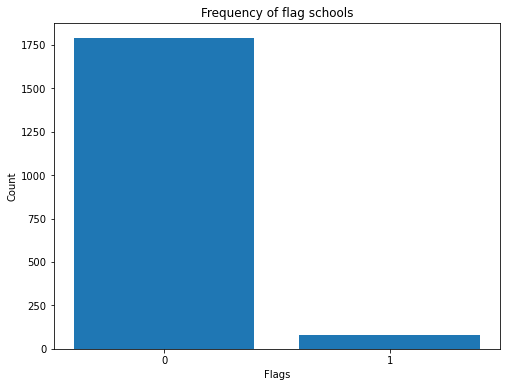

In [42]:
value_counts = df3['flag'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Flags')
plt.ylabel('Count')
plt.title('Frequency of flag schools')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [43]:
import seaborn as sns

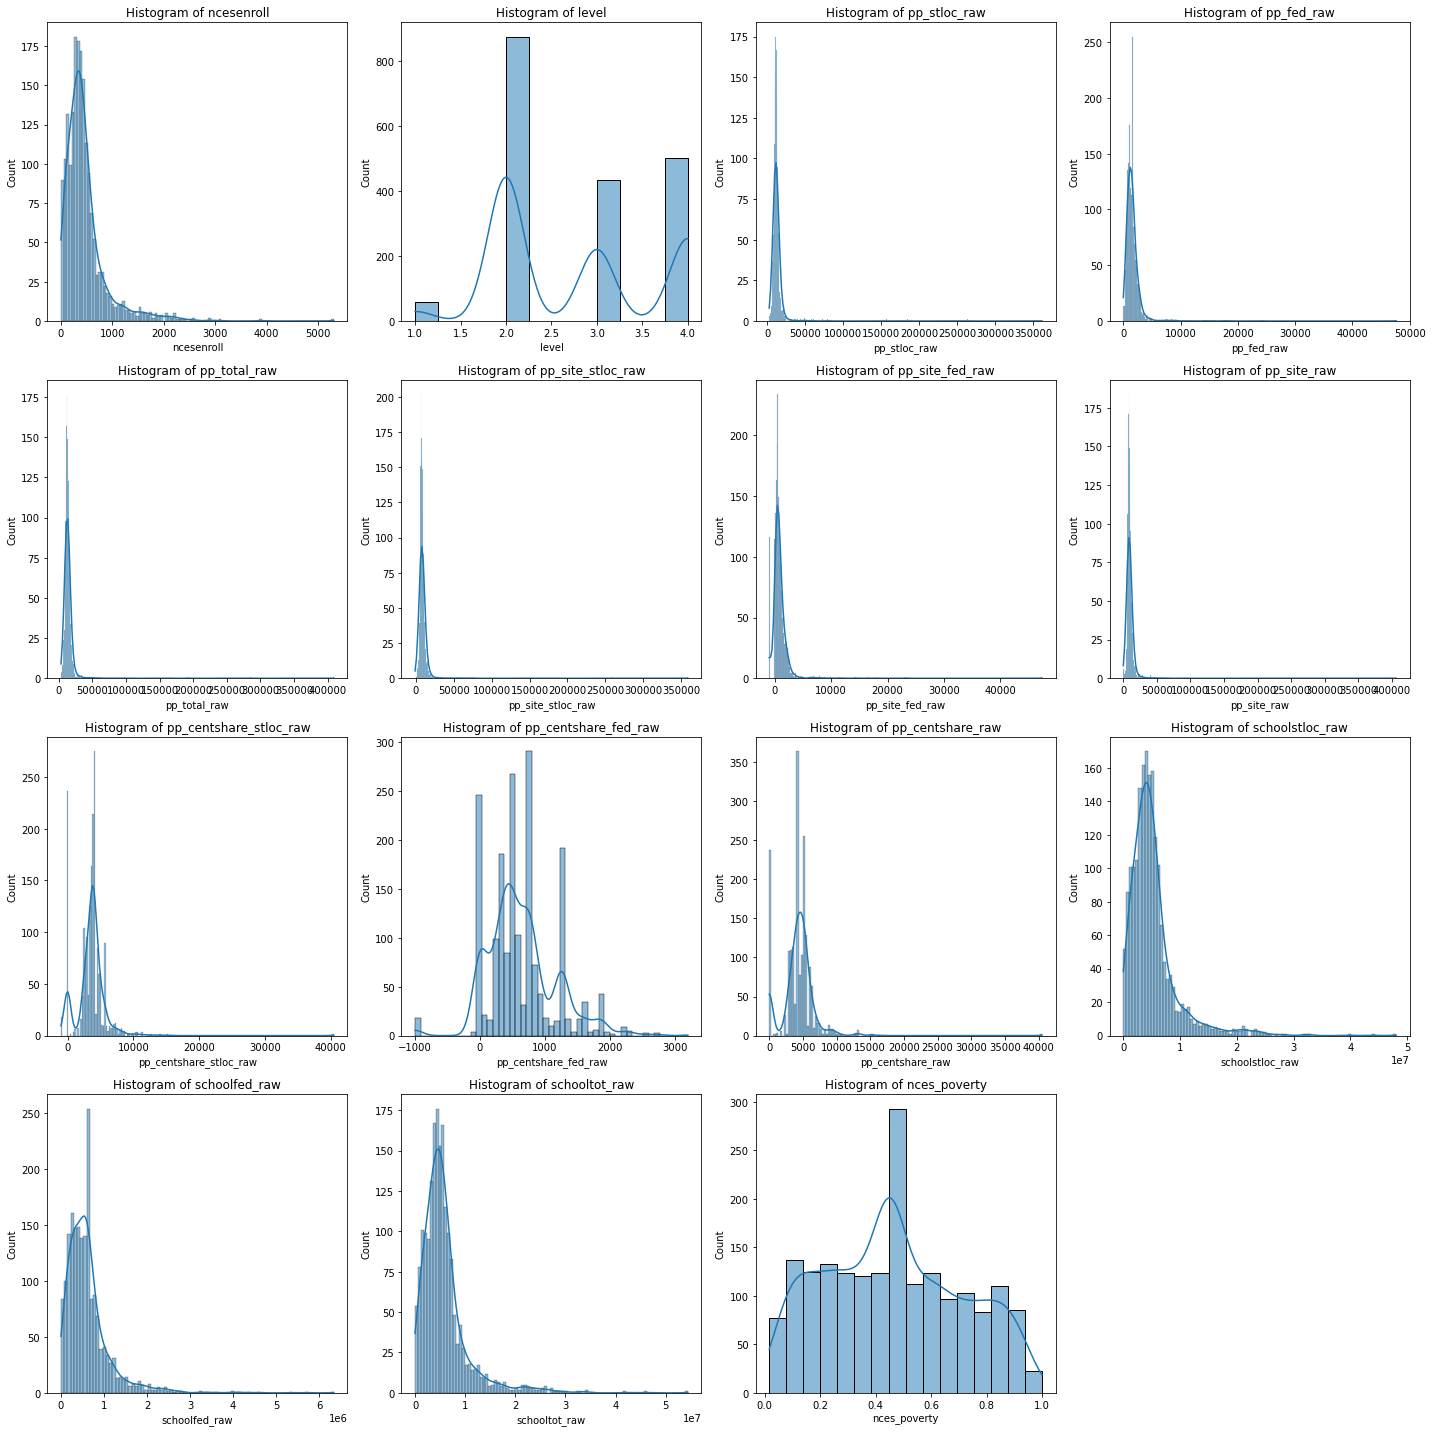

In [44]:
# Define the list of continuous columns
continuous_cols = ["ncesenroll", "level", "pp_stloc_raw", "pp_fed_raw", "pp_total_raw", "pp_site_stloc_raw", "pp_site_fed_raw", "pp_site_raw",
                   "pp_centshare_stloc_raw", "pp_centshare_fed_raw", "pp_centshare_raw", "schoolstloc_raw", "schoolfed_raw", "schooltot_raw", "nces_poverty"]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = len(continuous_cols) // num_cols + (1 if len(continuous_cols) % num_cols > 0 else 0) 

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D axes array

# Loop through the continuous columns and plot the histograms
for idx, col in enumerate(continuous_cols):
    sns.histplot(data=df3, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {col}')

# Remove extra subplots (if any)
for idx in range(len(continuous_cols), num_rows * num_cols):
    fig.delaxes(axes[idx])

# Display the plots
plt.tight_layout()
plt.show()